In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

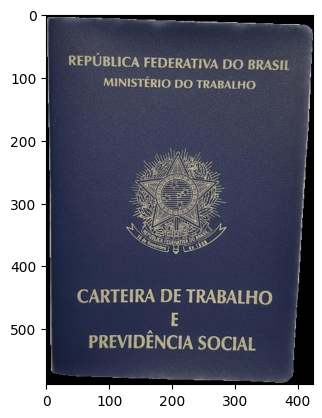

In [2]:
# Carrega imagem
obj = cv.imread("imgs/objs/carteiratrabalho.png")
obj_hsv = cv.cvtColor(obj, cv.COLOR_BGR2HSV)
plt.imshow(cv.cvtColor(obj, cv.COLOR_BGR2RGB))

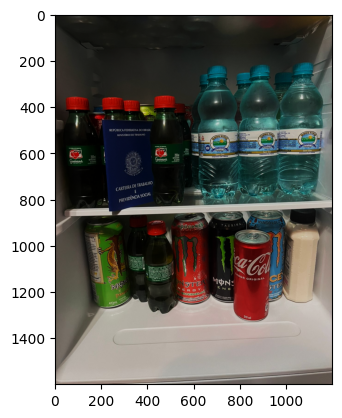

In [3]:
# Carrega cena
cena = cv.imread("imgs/cenas/cena6.png")
cena_hsv = cv.cvtColor(cena,cv.COLOR_BGR2HSV)
plt.imshow(cv.cvtColor(cena, cv.COLOR_BGR2RGB))

In [4]:
# Calcula os histogramas de cor
obj_hist  = cv.calcHist([obj_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )
cena_hist = cv.calcHist([cena_hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
cv.normalize(obj_hist,obj_hist,0,255,cv.NORM_MINMAX)
dst = cv.calcBackProject([cena_hsv],[0,1],obj_hist,[0,180,0,256],1)
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
cv.filter2D(dst,-1,disc,dst)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

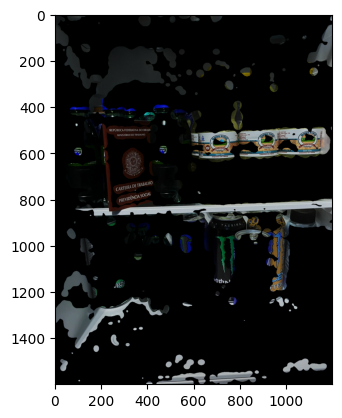

In [5]:
blur = cv.GaussianBlur(dst,(41,41),0)
ret, thresh = cv.threshold(blur,0,255,cv.THRESH_BINARY)
thresh = cv.merge((thresh,thresh,thresh))
res = cv.bitwise_and(cena,thresh)
plt.imshow(res)

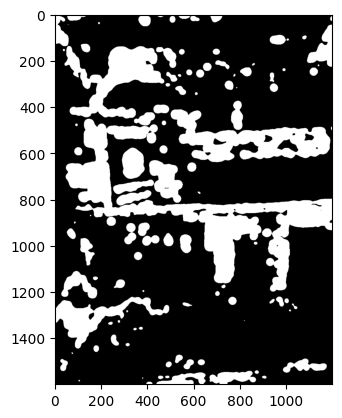

In [6]:
plt.imshow(thresh)

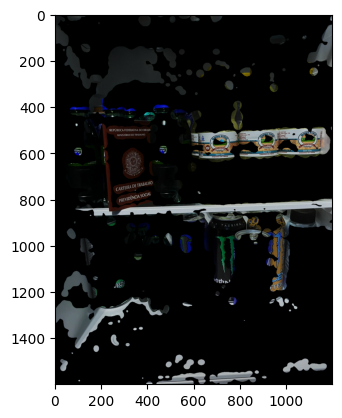

In [7]:
plt.imshow(res)

In [8]:
res = np.vstack((cena,thresh,res))
cv.imwrite('res.jpg',res)

True

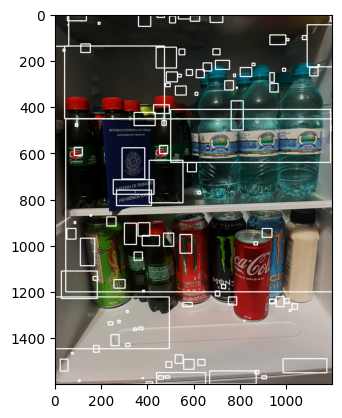

In [13]:
contornos=cv.findContours(cv.cvtColor(thresh, cv.COLOR_BGR2GRAY), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contornos = contornos[0] if len(contornos) == 2 else contornos[1]
for i in contornos:
    x,y,w,h = cv.boundingRect(i)
    cv.rectangle(cena, (x, y), (x + w, y+h), (255,255,255), 4)
plt.imshow(cv.cvtColor(cena, cv.COLOR_BGR2RGB))